ChEn-3170: Computational Methods in Chemical Engineering Spring 2020 UMass Lowell; Prof. V. F. de Almeida **23Mar20**

# 10. Arrhenius Rate Constant Data Fitting
$  
  \newcommand{\Amtrx}{\boldsymbol{\mathsf{A}}}
  \newcommand{\Bmtrx}{\boldsymbol{\mathsf{B}}}
  \newcommand{\Mmtrx}{\boldsymbol{\mathsf{M}}}
  \newcommand{\Imtrx}{\boldsymbol{\mathsf{I}}}
  \newcommand{\Pmtrx}{\boldsymbol{\mathsf{P}}}
  \newcommand{\Lmtrx}{\boldsymbol{\mathsf{L}}}
  \newcommand{\Umtrx}{\boldsymbol{\mathsf{U}}}
  \newcommand{\Smtrx}{\boldsymbol{\mathsf{S}}}
  \newcommand{\xvec}{\boldsymbol{\mathsf{x}}}
  \newcommand{\avec}{\boldsymbol{\mathsf{a}}}
  \newcommand{\bvec}{\boldsymbol{\mathsf{b}}}
  \newcommand{\cvec}{\boldsymbol{\mathsf{c}}}
  \newcommand{\rvec}{\boldsymbol{\mathsf{r}}}
  \newcommand{\mvec}{\boldsymbol{\mathsf{m}}}
  \newcommand{\gvec}{\boldsymbol{\mathsf{g}}}
  \newcommand{\zerovec}{\boldsymbol{\mathsf{0}}}
  \newcommand{\norm}[1]{\bigl\lVert{#1}\bigr\rVert}
  \newcommand{\transpose}[1]{{#1}^\top}
  \DeclareMathOperator{\rank}{rank}
$

---
## Table of Contents
* [Introduction](#intro)
* [Arrhenius Data Fitting](#adf)
* [Experimental Data (10 points)](#ed10)
 * [Linear System](#ls10)
 * [LS Data Fitting](#lsdf10)
 * [LS Residual](#lsr10)
* [Experimental Data (20 points)](#ed20)
 * [Linear System](#ls20)
 * [LS Data Fitting](#lsdf20)
 * [LS Residual](#lsr20)
* [Experimental Data (80 points)](#ed80)
 * [Linear System](#ls80)
 * [LS Data Fitting](#lsdf80)
 * [LS Residual](#lsr80)
* [Results Comparison](#res)
---

## Introduction<a id="intro"></a>
The least squares method has a long history in data fitting. The theoretical notes we will need for this topic can be found in the course notes OneNote [ChEn-3170-lsq](https://studentuml-my.sharepoint.com/:o:/g/personal/valmor_dealmeida_uml_edu/EiM3bxHy8gZOhgt0yQnAuOABtJBvGw9LfvhBsKNjxpwk7g?e=DmfFaf). 

## Arrhenius Data Fitting<a id="adf"></a>
This notebook will apply the previous developments in the course to fit experimental data to a model. Here the example is the Arrhenius expression for the dependency of the reaction rate constant on temperature, namely

\begin{equation*}
k(T) = k_0 \, e^{-\frac{E_\text{a}}{R\,T}}.
\end{equation*}

The pre-exponential factor (frequency parameter), $k_0$, and the energy of activation, $E_\text{a}$, are the sought parameters in this expression. The linear least squares method for finding the optimal values of $k_0$ and $E_\text{a}$ can only be used for a linear relationship between the parameters. This can be obtained by taking the natural logarithm of the Arrhenius expression to give

\begin{equation*}
\ln k = \ln k_0 - \frac{E_\text{a}}{R\,T}.
\end{equation*}

In this transformed form, the sought parameters are now $\ln k_0$ and $E_\text{a}$. We will define the coldness variable, $\beta = \frac{1}{R\,T}$, hence

\begin{equation*}
\ln k = \ln k_0 - \beta\,E_\text{a}.
\end{equation*}

Therefore the problem at hand is to find the *optimum* values of the parameters $\ln k_0$ and $E_\text{a}$ for a given set of data points $\bigl((\ln k)_i, \beta_i\bigr)$ for $i=1,\ldots,m$ which results into a system of linear algebraic equations

\begin{equation*}
(\ln k)_i = \ln k_0 - \beta_i\,E_\text{a} \quad\ \forall \quad\ i=1,\ldots,m.
\end{equation*}

The corresponding matrix system is

\begin{equation*}
 \begin{pmatrix}
  1 & -\beta_1  \\
  1 & -\beta_2 \\
  \vdots  & \vdots \\
  1 & -\beta_m
 \end{pmatrix} 
 \,
 \begin{pmatrix}
  \ln k_0 \\ 
  E_\text{a}  
 \end{pmatrix}
=
\begin{pmatrix}
 (\ln k)_1 \\ 
 (\ln k)_2 \\ 
 \vdots  \\ 
 (\ln k)_m \\ 
\end{pmatrix}
\end{equation*}

or

\begin{equation*}
\Amtrx\,\xvec = \bvec ,
\end{equation*}

where $\Amtrx =  \begin{pmatrix}
  1 & -\beta_1  \\
  1 & -\beta_2 \\
  \vdots  & \vdots \\
  1 & -\beta_m
 \end{pmatrix}$, 
 $\xvec =  \begin{pmatrix}
  \ln k_0 \\ 
  E_\text{a}  
 \end{pmatrix}$, 
and 
$\bvec = \begin{pmatrix}
 (\ln k)_1 \\ 
 (\ln k)_2 \\ 
 \vdots  \\ 
 (\ln k)_m \\ 
\end{pmatrix} $.

Since $\Amtrx$ is full rank when $\beta$'s are distinct, the least squares solution is unique and provides the *optimal* value of the parameters $\xvec$. Therefore solve the normal equations

\begin{equation*}
\Amtrx^\top\Amtrx\,\xvec_\text{LS}  = \Amtrx^\top\,\bvec .
\end{equation*}

The least squares solution $\xvec_\text{LS}$ gives the optimal values of the coefficients $\ln k_0$ and $E_\text{a}$ for the Arrhenius fit.

## Experimental Data (10 points)<a id="ed10"></a>
Data will be provided for exercises as ASCII files in the `data/` directory of the course [repository](https://github.com/dpploy/chen-3170/tree/master/notebooks/data). The data is organized in two columns of $T$ versus $k$. For example `data/k_x_T_10pts.dat`:
```
#(T,k) [K x 1/s]
r_cte = 8.314 [J/(mol.K)]
n_pts = 10
3.00000e+02 6.79538e-01
3.22222e+02 7.08972e-01
3.44444e+02 6.34251e-01
3.66667e+02 7.25196e-01
3.88889e+02 6.59508e-01
4.11111e+02 7.42922e-01
4.33333e+02 6.65461e-01
4.55556e+02 7.01082e-01
4.77778e+02 6.74563e-01
5.00000e+02 7.98533e-01
```

In [1]:
'''Function: read experimental data'''

def read_experimental_data( filename ):
    import io                     # import io module
    finput = open(filename, 'rt') # create file object

    import numpy as np

    for line in finput:
    
        line = line.strip() # original line
    
        if line[0] == '#': # skip comments in the file
            continue
        
        var_line = line.split(' = ') # variable line
    
        if var_line[0] == 'r_cte':
            r_cte = float(var_line[1].split(' ')[0])
            r_cte_units = var_line[1].split(' ')[1]
        elif var_line[0] == 'n_pts':
            n_pts = int(var_line[1])
            temp  = np.zeros(n_pts) # reserve space
            k_cte = np.zeros(n_pts) # reserve space
            idx   = 0 # counter
        else:
            data = line.split(' ') # original line
            temp[idx]  = float(data[0])
            k_cte[idx] = float(data[1])
            idx += 1
            
    return (r_cte, r_cte_units, n_pts, temp, k_cte)

In [2]:
'''Read experimental data'''

import numpy as np
(r_cte, r_cte_units, n_pts, temp_vec, k_cte_vec) = read_experimental_data('data/k_x_T_10pts.dat')
        
print('R = %4.3f %s'%(r_cte,r_cte_units))
print('m = ',n_pts)
np.set_printoptions(precision=2)
print('T =',temp_vec)
print('k =', k_cte_vec)

R = 8.314 [J/(mol.K)]
m =  10
T = [300.   322.22 344.44 366.67 388.89 411.11 433.33 455.56 477.78 500.  ]
k = [0.64 0.65 0.67 0.67 0.71 0.7  0.69 0.7  0.75 0.76]


In [3]:
'''Function: plot experimental data'''

def plot_experimental_data( temp, k_cte ):
    
    import matplotlib.pyplot as plt

    plt.figure(1, figsize=(7, 7))

    plt.plot(temp, k_cte,'r*',label='experimental')
    plt.xlabel(r'$T$ [K]',fontsize=14)
    plt.ylabel(r'$k$ [s$^{-1}$]',fontsize=14)
    plt.title('Arrhenius Rxn Rate Constant Data',fontsize=20)
    plt.legend(loc='best',fontsize=12)
    plt.grid(True)
    plt.show()
    
    return

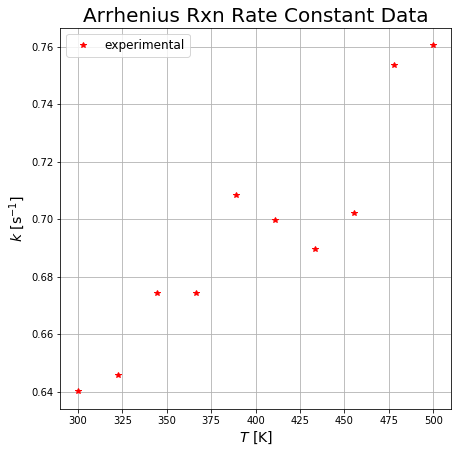

In [5]:
'''Plot experimental data'''
plot_experimental_data(temp_vec, k_cte_vec)

### Linear System<a id="ls10"></a>
Let's build the matrix system:

\begin{equation*}
\Amtrx\,\xvec = \bvec ,
\end{equation*}

where $\Amtrx =  \begin{pmatrix}
  1 & -\beta_1  \\
  1 & -\beta_2 \\
  \vdots  & \vdots \\
  1 & -\beta_m
 \end{pmatrix}$, 
 $\xvec =  \begin{pmatrix}
  \ln k_0 \\ 
  E_\text{a}  
 \end{pmatrix}$, 
and 
$\bvec = \begin{pmatrix}
 (\ln k)_1 \\ 
 (\ln k)_2 \\ 
 \vdots  \\ 
 (\ln k)_m \\ 
\end{pmatrix} $.

In [6]:
'''Function: build the matrix system'''

def build_linear_system( r_cte, temp, k_cte ):
    
    b_vec = np.log(k_cte)
    n_pts = b_vec.size

    a_mtrx = np.ones((n_pts,2))
    
    beta_vec = 1/np.copy(temp)/r_cte
    a_mtrx[:,1] = - beta_vec
    
    return (a_mtrx, b_vec)

In [7]:
'''Build the matrix system'''

(a_mtrx, b_vec) = build_linear_system( r_cte, temp_vec, k_cte_vec )

print('a_mtrx =\n',a_mtrx)
print('b_vec =',b_vec)

#from chen_3170 import toolkit
#print('rank(A) =',toolkit.matrix_rank(a_mtrx))
try:    
    from chen_3170.toolkit import matrix_rank   
except ModuleNotFoundError:
    assert False, 'You need to provide your own matrix_rank function here. Bailing out.'

print('My rank(A) =',matrix_rank(a_mtrx))
print('NumPy rank(A) =',np.linalg.matrix_rank(a_mtrx))

a_mtrx =
 [[ 1.00e+00 -4.01e-04]
 [ 1.00e+00 -3.73e-04]
 [ 1.00e+00 -3.49e-04]
 [ 1.00e+00 -3.28e-04]
 [ 1.00e+00 -3.09e-04]
 [ 1.00e+00 -2.93e-04]
 [ 1.00e+00 -2.78e-04]
 [ 1.00e+00 -2.64e-04]
 [ 1.00e+00 -2.52e-04]
 [ 1.00e+00 -2.41e-04]]
b_vec = [-0.45 -0.44 -0.39 -0.39 -0.34 -0.36 -0.37 -0.35 -0.28 -0.27]
My rank(A) = 2
NumPy rank(A) = 2


### LS Data Fitting<a id="lsdf10"></a>

Let's build the LS normal equations and solve

\begin{equation*}
\Amtrx^\top\Amtrx\,\xvec_\text{LS}  = \Amtrx^\top\,\bvec .
\end{equation*}

The least squares solution $\xvec_\text{LS}$ gives the optimal values of the coefficients $\ln k_0$ and $E_\text{a}$ for the Arrhenius fit.

In [8]:
'''Build and solve the normal equations'''

try:    
    from chen_3170.toolkit import solve   
except ModuleNotFoundError:
    assert False, 'You need to provide your own solve function here. Bailing out.'
    
x_vec = solve( a_mtrx.transpose()@a_mtrx, a_mtrx.transpose()@b_vec )
print('x_vec =',x_vec)

x_vec = np.linalg.solve( a_mtrx.transpose()@a_mtrx, a_mtrx.transpose()@b_vec )
print('||x_vec - NumPy x_vec|| = ',np.linalg.norm(x_vec - np.linalg.solve(a_mtrx.transpose()@a_mtrx,a_mtrx.transpose()@b_vec)))

import math
k_0      = math.exp(x_vec[0])
energy_a = x_vec[1]

print('k_0 = %8.5e [1/s]'%k_0)
print('E_a = %8.5e [J/mol]'%energy_a)

x_vec = [-6.42e-02  9.76e+02]
||x_vec - NumPy x_vec|| =  0.0
k_0 = 9.37772e-01 [1/s]
E_a = 9.75755e+02 [J/mol]


In [13]:
'''Function: plot the fit in the transformed plane'''

def plot_fit_transformed(r_cte,temp,k_cte, k_0, energy_a):
    
    import matplotlib.pyplot as plt
    
    plt.figure(2, figsize=(6, 6))

    # plot experimental data
    beta_expt = 1.0/r_cte/temp
    plt.plot(beta_expt*1e+3, np.log(k_cte),'r*',label='experimental')

    # plot Arrhenius expression
    n_plot_pts = 100
    temp_plot = np.linspace(temp[0],temp[-1],n_plot_pts)
    beta_plot = 1.0/temp_plot/r_cte
    ln_k_plot = math.log(k_0) - beta_plot * energy_a # logarithm of Arrhenius expression
    plt.plot(beta_plot*1e+3, ln_k_plot,'b-',label='LS fitting' )

    plt.xlabel(r'$\beta$ [$10^{-3}$ mol/J]',fontsize=16)
    plt.ylabel('ln k [ ]',fontsize=16)
    plt.title('Arrhenius Rxn Rate Constant Data',fontsize=20)

    (x_min,x_max) = plt.xlim()
    dx = abs(x_max-x_min)
    x_text = x_min + dx*0.05
    
    (y_min,y_max) = plt.ylim()
    dy = abs(y_max-y_min)
    y_text = y_min + dy*0.05
    
    plt.text(x_text, y_text, 
             r'$k_0=$%8.2e [1/s],   $E_a$=%8.2e [J/mol]'%
             (k_0,energy_a),fontsize=16)

    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.legend(loc='best',fontsize=12)
    plt.grid(True)
    plt.show()

    return

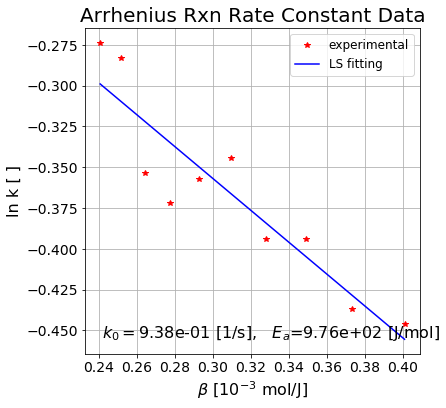

In [14]:
'''Plot the fit in the transformed plane'''

plot_fit_transformed(r_cte, temp_vec, k_cte_vec, k_0, energy_a)

In [11]:
'''Function: plot the fit in the Cartesian plane'''

def plot_fit_cartesian(r_cte,temp,k_cte, k_0, energy_a):
    
    import matplotlib.pyplot as plt
    
    plt.figure(2, figsize=(6, 6))

    # plot experimental data
    plt.plot(temp, k_cte,'r*',label='experimental')

    # plot Arrhenius expression
    n_plot_pts = 100
    temp_plot = np.linspace(temp[0],temp[-1],n_plot_pts)
    k_plot    = k_0 * np.exp(-energy_a/temp_plot/r_cte) # Arrhenius expression
    plt.plot(temp_plot,k_plot,'b-',label='LS fitting' )

    plt.xlabel(r'$T$ [K]',fontsize=16)
    plt.ylabel(r'$k$ [s$^{-1}$]',fontsize=16)
    plt.title('Arrhenius Rxn Rate Constant Data',fontsize=20)

    (x_min,x_max) = plt.xlim()
    dx = abs(x_max-x_min)
    x_text = x_min + dx*0.07
    
    (y_min,y_max) = plt.ylim()
    dy = abs(y_max-y_min)
    y_text = y_min + dy*0.05
    plt.text(x_text, y_text, r'$k_0=$%8.2e [1/s],   $E_a$=%8.2e [J/mol]'%(k_0,energy_a),fontsize=16)
    
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.legend(loc='best',fontsize=12)
    plt.grid(True)
    plt.show()

    return

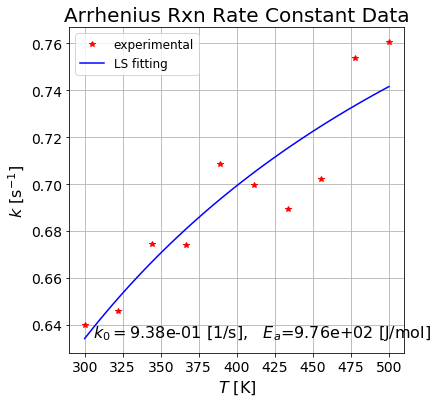

In [12]:
'''Plot the fit in the Cartesian plane'''

plot_fit_cartesian(r_cte, temp_vec, k_cte_vec, k_0, energy_a)

### LS Residual<a id="lsr10"></a>

Let's calculate the residual

\begin{equation*}
\rvec = \bvec - \Amtrx\,\xvec_\text{LS} 
\end{equation*}

and its norm squared at the $\xvec$ point, that is, the objective function of the LS problem:

\begin{equation*}
\phi(\xvec_\text{LS}) = \norm{\rvec}^2.
\end{equation*}

Let's show graphically that 

\begin{equation*}
\phi(\xvec_\text{LS}) = \min\limits_{\xvec} \norm{\rvec}^2 ,
\end{equation*}

that is, the least-squares solution sits at the bottom of the objective function surface.

Information on `matplotlib` plots in 3D is found [here](https://matplotlib.org/tutorials/toolkits/mplot3d.html#sphx-glr-tutorials-toolkits-mplot3d-py).

In [15]:
'''Examining the residual'''

r_vec = b_vec - a_mtrx @ x_vec
phi_ls = np.linalg.norm(r_vec)**2
# phi_ls = np.dot(r_vec,r_vec) # alternative dot product

print('phi(x_LS)       = %8.3e'%phi_ls)
print('sqrt(phi(x_LS)) = %8.3e'%math.sqrt(phi_ls))
print('goodness of fit = %8.3e'%math.sqrt(phi_ls/n_pts))
print('STD(r_vec)      = %8.3e'%np.std(r_vec))

phi(x_LS)       = 4.614e-03
sqrt(phi(x_LS)) = 6.793e-02
goodness of fit = 2.148e-02
STD(r_vec)      = 2.148e-02


In [16]:
'''Function: objective function around the minimum'''

def get_objective_function_data(n_plot_pts, a_mtrx, x_vec, b_vec):
    
    import numpy as np
    
    # create the objective function array
    ln_k_0_pts = np.linspace( 0.9*x_vec[0], x_vec[0]*1.1, n_plot_pts )
    energy_pts = np.linspace( 0.9*x_vec[1], x_vec[1]*1.1, n_plot_pts )
    
    phi = np.zeros((n_plot_pts,n_plot_pts))
    
    i = -1
    for ln_k_0 in ln_k_0_pts:
        i += 1
        j = -1
        for e_a in energy_pts:
            j += 1
            res = b_vec - a_mtrx @ np.array( [ln_k_0,e_a] )
            phi[i,j] = np.dot(res,res)
            
    return (ln_k_0_pts, energy_pts, phi)

In [17]:
'''Function: plot the objective function around the minimum'''

def plot_objective_function(objective_function_data):# a_mtrx, x_vec, b_vec):
    
    (ln_k_0_pts, energy_pts, phi) = objective_function_data # unpack the data
            
    # 3D-plot the surface of the objective function
    import numpy as np
    import matplotlib.pyplot as plt
    from matplotlib import cm
    from mpl_toolkits.mplot3d import Axes3D

    fig = plt.figure(3,figsize=(6, 6))
    
    ax = Axes3D(fig)
    
    ax.plot_surface( ln_k_0_pts, energy_pts, phi, rstride=1, cstride=1, cmap=cm.viridis )
    
    ax.view_init(azim=10)

    ax.set_xlabel(r'$\ln k_0$ [ ]',fontsize=16)
    ax.set_ylabel(r'$E_a$ [J/mol]',fontsize=16)
    ax.set_zlabel(r'$\phi$',fontsize=16)

    plt.show()
    
    # plot the contour curves of the objective function
    from matplotlib import ticker, cm
    fig, ax = plt.subplots(figsize=(6, 6))
    delta = np.min(np.min(phi))/100.0 * 0.06 # 0.06% variation near the minimum
    cv = np.linspace(np.min(np.min(phi))+delta,np.max(np.max(phi)),10);
    cs = ax.contour(ln_k_0_pts, energy_pts, phi, cv)
    xpos = x_vec[0]
    ypos = x_vec[1]
    plt.text(xpos,ypos,r'* ($\ln k_0$=%5.2e, $E_a$=%5.2e)'%(x_vec[0],x_vec[1]),color='r',fontsize=12);
    plt.xlabel(r'$\ln k_0$ []',fontsize=14)
    plt.ylabel(r'$E_a$ [J/mol]',fontsize=14)

    plt.show()
    return

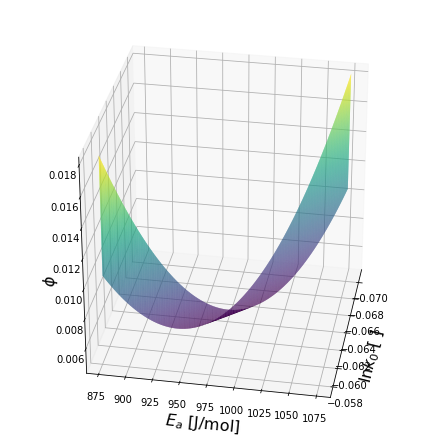

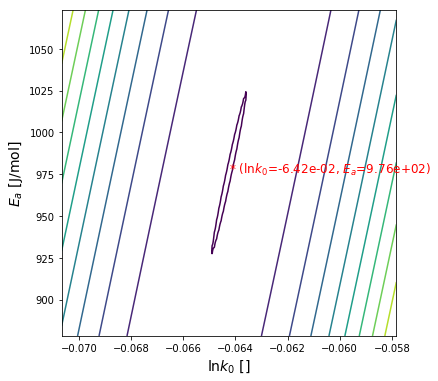

In [18]:
'''Plot the objective function surface around the minimum'''

n_plot_pts = 150

objective_function_data = get_objective_function_data(n_plot_pts, a_mtrx, x_vec, b_vec)

plot_objective_function( objective_function_data )

In [19]:
'''Plot the objective function around the minimum'''
#!pip install plotly

(x_vec, y_vec, z_mtrx) = objective_function_data

import plotly
import plotly.graph_objs as go

plotly.offline.init_notebook_mode(connected=True)

data = [ go.Surface(z=z_mtrx) ]
layout = go.Layout(
        title='Objective Function Surface',
        autosize=False,
        width=500,
        height=500,
        margin=dict(
            l=65,
            r=50,
            b=65,
            t=90
        )
    )

plotly.offline.iplot({
    "data": data,
    "layout": layout
})

## Experimental Data (20 points)<a id="ed20"></a>
Data will be provided for exercises as ASCII files in the `data/` directory of the course [repository](https://github.com/dpploy/chen-3170/data). The data is organized in two columns of $T$ versus $k$. For example `data/k_x_T_20pts.dat`:
```
#(T,k) [K x 1/s]
r_cte = 8.314 [J/(mol.K)]
n_pts = 20
3.00000e+02 6.46842e-01
3.10526e+02 6.51310e-01
3.21053e+02 6.30482e-01
3.31579e+02 6.07467e-01
3.42105e+02 6.85455e-01
3.52632e+02 7.00184e-01
3.63158e+02 7.39440e-01
3.73684e+02 6.89361e-01
3.84211e+02 7.06639e-01
3.94737e+02 6.56265e-01
4.05263e+02 6.97063e-01
4.15789e+02 7.27683e-01
4.26316e+02 6.89620e-01
4.36842e+02 7.26620e-01
4.47368e+02 6.98762e-01
4.57895e+02 7.24678e-01
4.68421e+02 7.63007e-01
4.78947e+02 8.17275e-01
4.89474e+02 7.30909e-01
5.00000e+02 7.32861e-01
```

In [20]:
'''Read experimental data'''

(r_cte, r_cte_units, n_pts, temp_vec, k_cte_vec) = read_experimental_data('data/k_x_T_20pts.dat')
        
print('R = %4.3f %s'%(r_cte,r_cte_units))
print('m = ',n_pts)
np.set_printoptions(precision=2)
print('T =',temp_vec)
print('k =', k_cte_vec)

R = 8.314 [J/(mol.K)]
m =  20
T = [300.   310.53 321.05 331.58 342.11 352.63 363.16 373.68 384.21 394.74
 405.26 415.79 426.32 436.84 447.37 457.89 468.42 478.95 489.47 500.  ]
k = [0.64 0.67 0.67 0.68 0.68 0.69 0.69 0.71 0.66 0.68 0.73 0.73 0.7  0.7
 0.7  0.74 0.75 0.7  0.75 0.73]


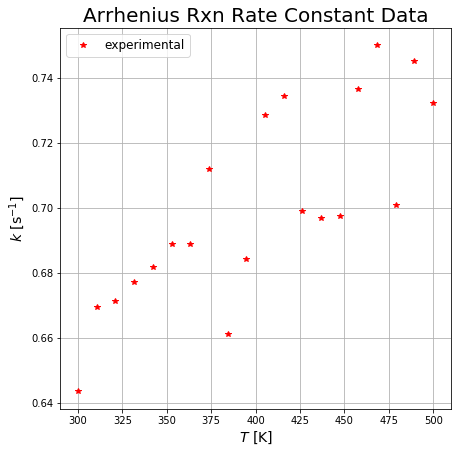

In [21]:
'''Plot experimental data'''

plot_experimental_data(temp_vec, k_cte_vec)

### Linear System<a id="ls20"></a>

In [22]:
'''Build the matrix system'''

(a_mtrx, b_vec) = build_linear_system( r_cte, temp_vec, k_cte_vec )

print('My rank(A)    =',matrix_rank(a_mtrx))
print('NumPy rank(A) =',np.linalg.matrix_rank(a_mtrx))

My rank(A)    = 2
NumPy rank(A) = 2


### LS Data Fitting<a id="lsdf20"></a>

In [23]:
'''Build and solve the normal equations'''

x_vec = solve( a_mtrx.transpose()@a_mtrx, a_mtrx.transpose()@b_vec )

print('x_vec =',x_vec)

import math
k_0      = math.exp(x_vec[0])
energy_a = x_vec[1]

print('k_0 = %8.5e [1/s]'%k_0)
print('E_a = %8.5e [J/mol]'%energy_a)

x_vec = [-1.46e-01  6.88e+02]
k_0 = 8.64326e-01 [1/s]
E_a = 6.87566e+02 [J/mol]


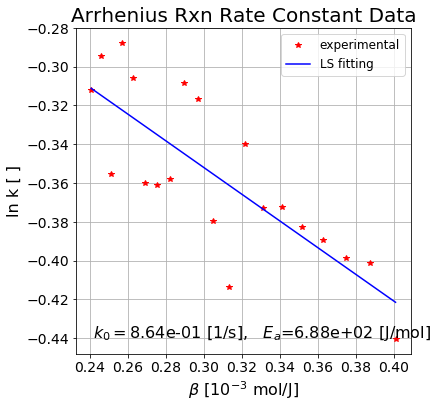

In [24]:
'''Plot the fit in the transformed plane'''

plot_fit_transformed(r_cte, temp_vec, k_cte_vec, k_0, energy_a)

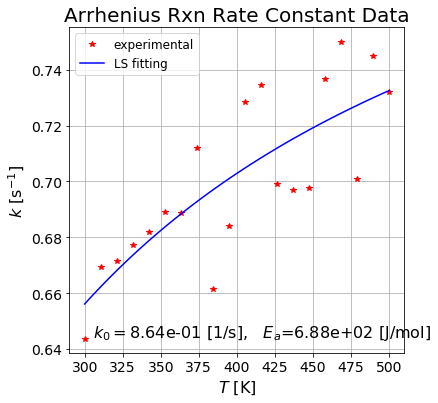

In [25]:
'''Plot the fit in the Cartesian plane'''

plot_fit_cartesian(r_cte, temp_vec, k_cte_vec, k_0, energy_a)

### LS Residual<a id="lsr20"></a>

In [26]:
'''Examining the residual'''

r_vec = b_vec - a_mtrx @ x_vec
phi_ls = np.linalg.norm(r_vec)**2

print('phi(x_LS)       = %8.3e'%phi_ls)
print('sqrt(phi(x_LS)) = %8.3e'%math.sqrt(phi_ls))
print('goodness of fit = %8.3e'%math.sqrt(phi_ls/n_pts))
print('STD(r_vec)      = %8.3e'%np.std(r_vec))

phi(x_LS)       = 1.242e-02
sqrt(phi(x_LS)) = 1.114e-01
goodness of fit = 2.492e-02
STD(r_vec)      = 2.492e-02


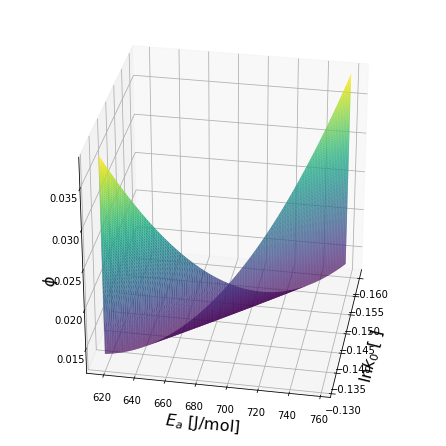

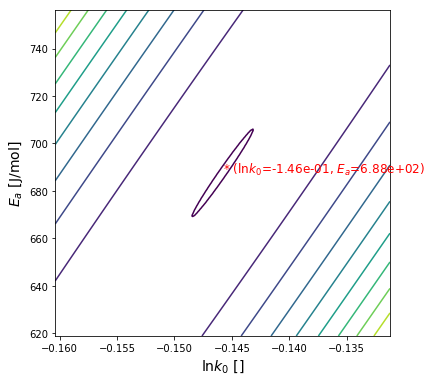

In [27]:
'''Plot the objective function surface around the minimum'''

n_plot_pts = 150

objective_function_data = get_objective_function_data(n_plot_pts, a_mtrx, x_vec, b_vec)

plot_objective_function( objective_function_data )

## Experimental Data (80 points)<a id="ed80"></a>
Data will be provided for exercises as ASCII files in the `data/` directory of the course [repository](https://github.com/dpploy/chen-3170/data). The data is organized in two columns of $T$ versus $k$. For example `data/k_x_T_80pts.dat`.

In [28]:
'''Read experimental data'''

import numpy as np

(r_cte, r_cte_units, n_pts, temp_vec, k_cte_vec) = read_experimental_data('data/k_x_T_80pts.dat')
        
print('R = %4.3f %s'%(r_cte,r_cte_units))
print('m = ',n_pts)
np.set_printoptions(precision=2)
print('T =',temp_vec)
print('k =', k_cte_vec)

R = 8.314 [J/(mol.K)]
m =  80
T = [300.   302.53 305.06 307.6  310.13 312.66 315.19 317.72 320.25 322.79
 325.32 327.85 330.38 332.91 335.44 337.98 340.51 343.04 345.57 348.1
 350.63 353.17 355.7  358.23 360.76 363.29 365.82 368.35 370.89 373.42
 375.95 378.48 381.01 383.54 386.08 388.61 391.14 393.67 396.2  398.73
 401.27 403.8  406.33 408.86 411.39 413.92 416.46 418.99 421.52 424.05
 426.58 429.11 431.65 434.18 436.71 439.24 441.77 444.3  446.83 449.37
 451.9  454.43 456.96 459.49 462.02 464.56 467.09 469.62 472.15 474.68
 477.21 479.75 482.28 484.81 487.34 489.87 492.4  494.94 497.47 500.  ]
k = [0.66 0.64 0.65 0.67 0.66 0.64 0.68 0.66 0.67 0.67 0.67 0.67 0.68 0.68
 0.67 0.68 0.69 0.68 0.68 0.66 0.69 0.66 0.69 0.68 0.68 0.69 0.68 0.68
 0.7  0.69 0.7  0.7  0.7  0.73 0.69 0.72 0.7  0.69 0.71 0.69 0.7  0.7
 0.7  0.7  0.71 0.72 0.71 0.69 0.73 0.73 0.71 0.71 0.7  0.73 0.74 0.73
 0.73 0.71 0.72 0.72 0.71 0.73 0.75 0.72 0.73 0.74 0.73 0.72 0.73 0.73
 0.73 0.75 0.71 0.76 0.75 0.77 0.74 0.73

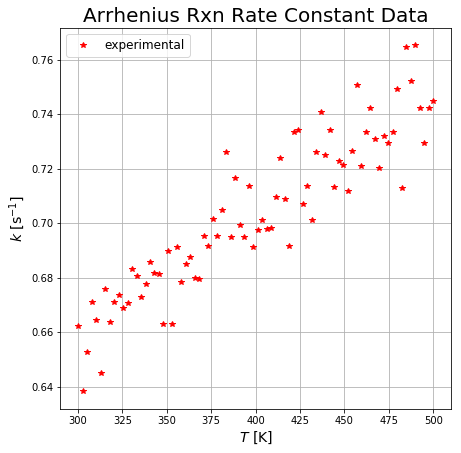

In [29]:
'''Plot experimental data'''

plot_experimental_data(temp_vec, k_cte_vec)

### Linear System<a id="ls80"></a>

In [30]:
'''Build the matrix system'''

(a_mtrx, b_vec) = build_linear_system( r_cte, temp_vec, k_cte_vec )

print('My rank(A)    =',matrix_rank(a_mtrx))
print('NumPy rank(A) =',np.linalg.matrix_rank(a_mtrx))

My rank(A)    = 2
NumPy rank(A) = 2


### LS Data Fitting<a id="lsdf80"></a>

In [31]:
'''Build and solve the normal equations'''

x_vec = solve( a_mtrx.transpose()@a_mtrx, a_mtrx.transpose()@b_vec )
print('x_vec =',x_vec)

import math
k_0 = math.exp(x_vec[0])
energy_a = x_vec[1]

print('k_0 = %8.5e [1/s]'%k_0)
print('E_a = %8.5e [J/mol]'%energy_a)

x_vec = [-1.03e-01  8.09e+02]
k_0 = 9.01685e-01 [1/s]
E_a = 8.09233e+02 [J/mol]


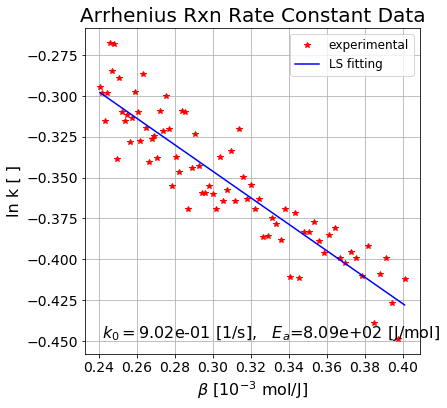

In [32]:
'''Plot the fit in the transformed plane'''

plot_fit_transformed(r_cte, temp_vec, k_cte_vec, k_0, energy_a)

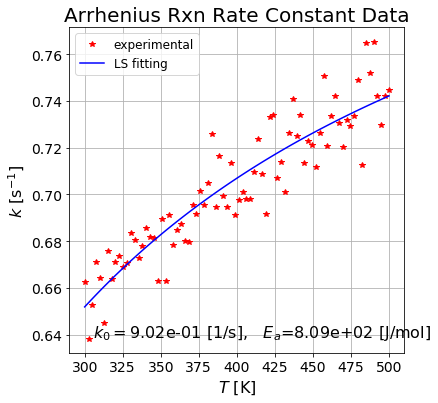

In [33]:
'''Plot the fit in the Cartesian plane'''

plot_fit_cartesian(r_cte, temp_vec, k_cte_vec, k_0, energy_a)

### LS Residual<a id="lsr80"></a>

In [34]:
'''Examining the residual'''

r_vec = b_vec - a_mtrx @ x_vec
phi_ls = np.linalg.norm(r_vec)**2

print('phi(x_LS)       = %8.3e'%phi_ls)
print('sqrt(phi(x_LS)) = %8.3e'%math.sqrt(phi_ls))
print('goodness of fit = %8.3e'%math.sqrt(phi_ls/n_pts))
print('STD(r_vec)      = %8.3e'%np.std(r_vec))

phi(x_LS)       = 2.100e-02
sqrt(phi(x_LS)) = 1.449e-01
goodness of fit = 1.620e-02
STD(r_vec)      = 1.620e-02


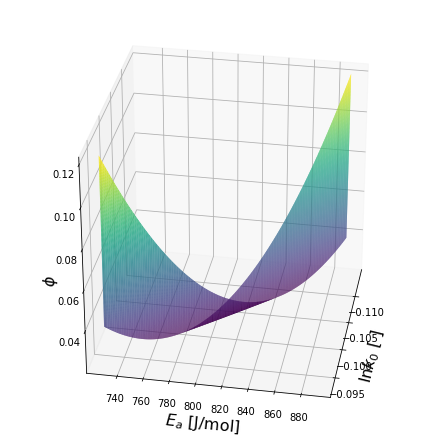

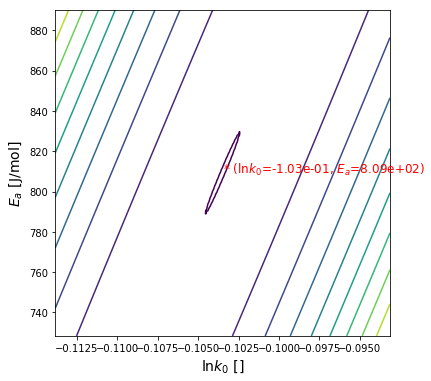

In [35]:
'''Plot the objective function surface around the minimum'''

n_plot_pts = 150

objective_function_data = get_objective_function_data(n_plot_pts, a_mtrx, x_vec, b_vec)

plot_objective_function( objective_function_data )

## Results Comparison<a id="res"></a>

|            Parameters                           |  10 pts  |  20 pts  | 80 pts   |
| ------------------------------------- | -------- | -------  | -------- |
| Pre-exponential factor, $k_0$, 1/s    | 9.38e-01 | 8.64e-01 | 9.02e-01 |
| Energy of activation, $E_a$, J/mol    | 9.76e+02 | 6.88e+02 | 8.09e+02 |
| Residual norm                         | 6.79e-02 | 1.11e-01 | 1.45e-01 |
| Goodness of fit                       | 2.15e-02 | 2.49e-02 | 1.62e-02 |